<a href="https://colab.research.google.com/github/s-prakriti/Deep-Learning-Experiments-/blob/main/Experiment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import sys


X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y = np.array([
    [1],
    [1],
    [0],
    [0]
])


num_i_units = 2
num_h_units = 2
num_o_units = 1

learning_rate = 0.1
reg_param = 0
max_iter = 5000

m = 4

print("Data loaded successfully!")
print("X:\n", X)
print("y:\n", y)


Data loaded successfully!
X:
 [[0 1]
 [1 0]
 [1 1]
 [0 0]]
y:
 [[1]
 [1]
 [0]
 [0]]


In [3]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units))
W2 = np.random.normal(0, 1, (num_o_units, num_h_units))

B1 = np.random.random((num_h_units, 1))
B2 = np.random.random((num_o_units, 1))

def sigmoid(z, derv=False):
    if derv:
        return z * (1 - z)
    return 1 / (1 + np.exp(-z))

def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1)

    z2 = np.dot(W1, a1) + B1
    a2 = sigmoid(z2)

    z3 = np.dot(W2, a2) + B2
    a3 = sigmoid(z3)

    if predict:
        return a3
    return a1, a2, a3

dW1 = 0
dW2 = 0
dB1 = 0
dB2 = 0

cost = np.zeros((max_iter, 1))
for i in range(max_iter):
    c = 0

    dW1 = 0
    dW2 = 0
    dB1 = 0
    dB2 = 0

    for j in range(m):
        sys.stdout.write(
            "\rIteration: {} | Sample: {}".format(i + 1, j + 1)
        )
        sys.stdout.flush()


Iteration: 5000 | Sample: 4

In [5]:
for i in range(max_iter):
    c = 0

    dW1 = 0
    dW2 = 0
    dB1 = 0
    dB2 = 0

    for j in range(m):


        a0 = X[j].reshape(X[j].shape[0], 1)

        z1 = np.dot(W1, a0) + B1
        a1 = sigmoid(z1)

        z2 = np.dot(W2, a1) + B2
        a2 = sigmoid(z2)

        dz2 = a2 - y[j]
        dW2 += np.dot(dz2, a1.T)

        dz1 = np.multiply(np.dot(W2.T, dz2), sigmoid(a1, derv=True))
        dW1 += np.dot(dz1, a0.T)

        dB1 += dz1
        dB2 += dz2

        c += (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))

        sys.stdout.write(f"\rIteration {i+1}/{max_iter}, Sample {j+1}/{m}")
        sys.stdout.flush()

    W1 = W1 - learning_rate * (dW1 / m) + ((reg_param / m) * W1)
    W2 = W2 - learning_rate * (dW2 / m) + ((reg_param / m) * W2)

    B1 = B1 - learning_rate * (dB1 / m)
    B2 = B2 - learning_rate * (dB2 / m)

    cost[i] = (c / m) + (
        (reg_param / (2 * m)) *
        (np.sum(W1**2) + np.sum(W2**2))
    )



Iteration 5000/5000, Sample 4/4


Input: [0 1]
Predicted Output: [[0.85965602]]

Input: [1 0]
Predicted Output: [[0.78145924]]

Input: [1 1]
Predicted Output: [[0.30893936]]

Input: [0 0]
Predicted Output: [[0.0400578]]


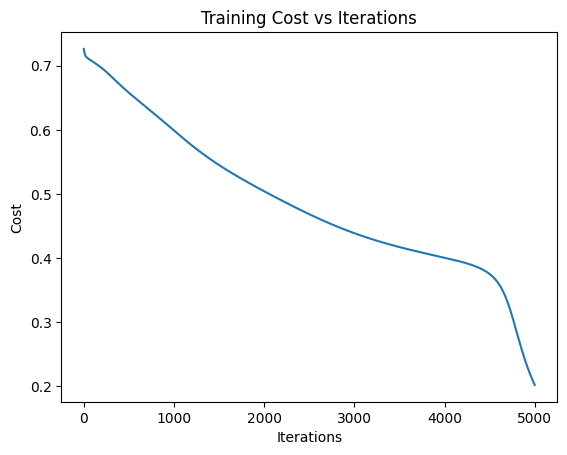

In [6]:

for x in X:
    print("\nInput:", x)
    print("Predicted Output:", forward(x, predict=True))
plt.plot(range(max_iter), cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Training Cost vs Iterations")
plt.show()
